In [17]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import keras

In [18]:
batch_size = 128
num_classes = 10
epochs = 12

In [29]:
# import argparse

# ap = argparse.ArgumentParser()
# ap.add_argument("-o","--output",required=True,help="path to the output loss/accuracy plot")
# args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -o OUTPUT
ipykernel_launcher.py: error: the following arguments are required: -o/--output


SystemExit: 2

# Setting up Data pipeline

In [19]:
# input image dimensions
img_rows, img_cols = 28, 28

In [20]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
x_train = x_train.astype('float32').reshape(-1,28*28)
x_test = x_test.astype('float32').reshape(-1,28*28)
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [23]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Define Model

In [24]:
# define the 784-256-128-10 architecture using keras
model = Sequential()
model.add(Dense(256, input_shape=(784,),activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

# Model training

In [26]:
sgd = SGD(0.01)
model.compile(
    loss="categorical_crossentropy",
    optimizer=sgd,
    metrics=["accuracy"]
)
H = model.fit(
    x_train, y_train,
    validation_data = (x_test,y_test),
    epochs=100,
    batch_size=128    
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 78us/step - loss: 2.3143 - acc: 0.1090 - val_loss: 2.3016 - val_acc: 0.1028
Epoch 2/100
60000/60000 [==============================] - 3s 57us/step - loss: 2.3019 - acc: 0.1106 - val_loss: 2.3021 - val_acc: 0.1135
Epoch 3/100
60000/60000 [==============================] - 3s 56us/step - loss: 2.3020 - acc: 0.1107 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 4/100
60000/60000 [==============================] - 3s 58us/step - loss: 2.3019 - acc: 0.1114 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 5/100
60000/60000 [==============================] - 3s 57us/step - loss: 2.3018 - acc: 0.1118 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 6/100
60000/60000 [==============================] - 3s 56us/step - loss: 2.3019 - acc: 0.1102 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 7/100
60000/60000 [==============================] - 4s 60us/step - loss: 2.3020 - acc: 0.1112 - val_loss: 2.3012 - 

60000/60000 [==============================] - 3s 58us/step - loss: 2.3019 - acc: 0.1111 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 60/100
60000/60000 [==============================] - 3s 56us/step - loss: 2.3019 - acc: 0.1108 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 61/100
60000/60000 [==============================] - 3s 55us/step - loss: 2.3019 - acc: 0.1105 - val_loss: 2.3023 - val_acc: 0.1135
Epoch 62/100
60000/60000 [==============================] - 3s 54us/step - loss: 2.3020 - acc: 0.1115 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 63/100
60000/60000 [==============================] - 3s 54us/step - loss: 2.3018 - acc: 0.1115 - val_loss: 2.3022 - val_acc: 0.1135
Epoch 64/100
60000/60000 [==============================] - 3s 54us/step - loss: 2.3018 - acc: 0.1112 - val_loss: 2.3015 - val_acc: 0.1028
Epoch 65/100
60000/60000 [==============================] - 3s 54us/step - loss: 2.3018 - acc: 0.1119 - val_loss: 2.3014 - val_acc: 0.1135
Epoch 66/100
60000/60000 [==============

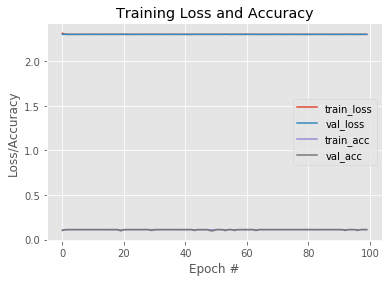

In [30]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("./output")